In [2]:
import numpy as np
import pyxdf
import matplotlib.pyplot as plt
from scipy import signal, fftpack


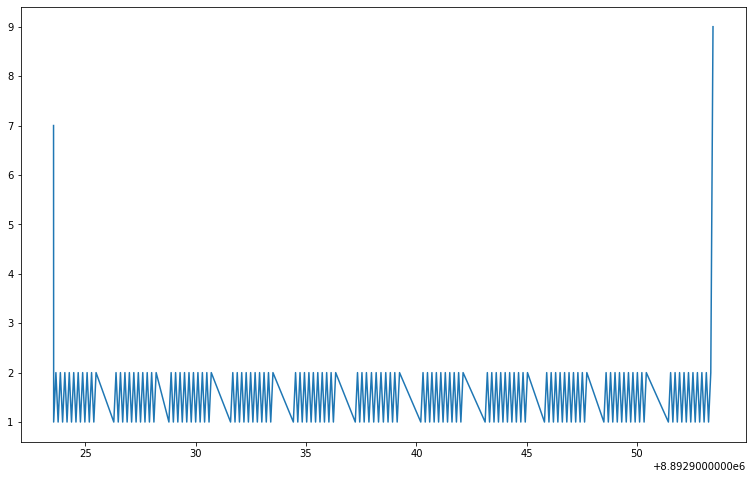

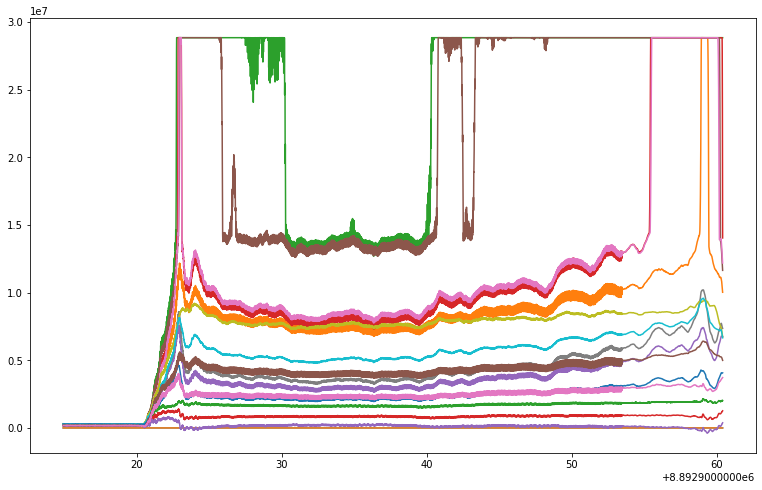

In [3]:
data, header=  pyxdf.load_xdf('P01-no-tacs-R1.xdf')

for stream in data:
    y = stream['time_series']

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.figure(figsize=(13,8))
        plt.plot(stream['time_stamps'][:], y[:])
    else:
        raise RuntimeError('Unknown stream format')



In [7]:
(data[1]['info'])

ict(list,
                                                      {'label': ['00:00:0'],
                                                       'chassis_id': ['0'],
                                                       'sensor_id': ['0'],
                                                       'calibration': ['2.980232238769531e-07'],
                                                       'type': ['misc'],
                                                       'unit': ['V'],
                                                       'mode': ['ADC']}),
                                          defaultdict(list,
                                                      {'label': ['00:01:50'],
                                                       'chassis_id': ['0'],
                                                       'sensor_id': ['1'],
                                                       'calibration': ['3.519999995828119e-15'],
                                                       'type':

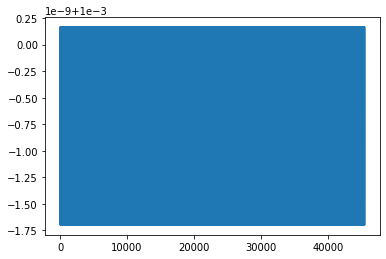

In [82]:
diff_ts = np.diff(stream['time_stamps'])
plt.plot(diff_ts[:])
# each flick should have a time difference of 100ms. 1000ms/10hz = 100ms diff... 
# 100ms / 1000ms = 0.1second


In [15]:
fieldline_data = data[1]['time_series']
stim_adc = fieldline_data[:, 11]
# print(data[0])
# print(fieldline_data.shape)

# plt.plot(fieldline_data[:1000, 4] * 1e-15)
# plt.plot(fieldline_data[:1000, 10] * 1e-15)

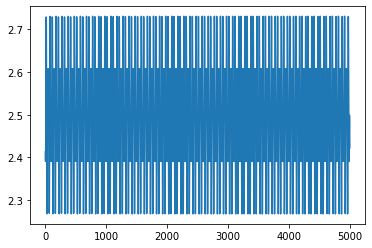

In [16]:
plt.plot(stim_adc[10000:15000])

(0.0, 30.0)

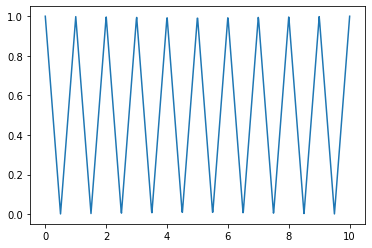

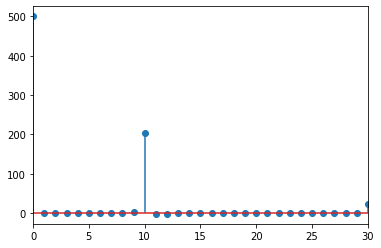

In [245]:

time=np.linspace(0, 10, 1000)
# print(time)
freq=1
tri=np.abs(signal.sawtooth(2 * np.pi * freq * time)) 
plt.plot(time,tri)


fou = fftpack.fft(tri)
freqs = fftpack.fftfreq(tri.shape[0]) * 1000

plt.figure()
plt.stem(freqs, fou.real)
plt.xlim(0,30)

